<p><font size="6"><b>01 - Pandas: Data Structures </b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [4]:
import pandas as pd

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Let's directly start with importing some data: the `titanic` dataset about the passengers of the Titanic and their survival:

In [6]:
df = pd.read_csv("titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading such a tabular dataset, Pandas provides the functionalities to answer questions about this data in a few lines of code. Let's start with a few examples as illustration:

<div class="alert alert-warning">

 <ul>
  <li>What is the age distribution of the passengers?</li>
</ul> 

</div>

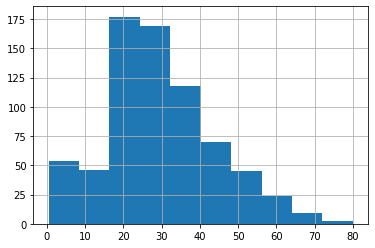

In [8]:
df['Age'].hist()

<div class="alert alert-warning">

 <ul>
  <li>How does the survival rate of the passengers differ between sexes?</li>
</ul> 

</div>

In [9]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


<div class="alert alert-warning">

 <ul>
  <li>Or how does the survival rate differ between the different classes of the Titanic?</li>
</ul> 

</div>

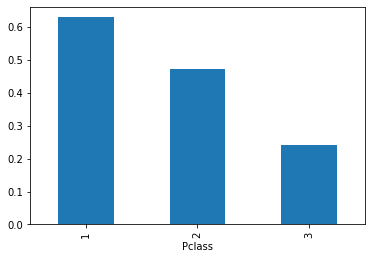

In [10]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

<div class="alert alert-warning">

 <ul>
  <li>Are young people (e.g. < 25 years) likely to survive?</li>
</ul> 

</div>

In [11]:
df['Survived'].sum() / df['Survived'].count()

0.3838383838383838

In [12]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

All the needed functionality for the above examples will be explained throughout the course, but as a start: the data types to work with.

# Data structures

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [13]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [14]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [15]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [16]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [17]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [18]:
s2['c']

2

### Pandas Series versus dictionaries

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [19]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

We can index the populations like a dict as expected:

In [20]:
population['France']

64.3

but with the power of numpy arrays:

In [21]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="../img/schema-dataframe.svg" width=50%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [22]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [23]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [24]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [25]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [26]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [27]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

To access a Series representing a column in the data, use typical indexing syntax:

In [28]:
countries['area']

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64

### Changing the DataFrame index

If we don't like what the index looks like, we can reset it and set one of our columns:

In [29]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


Reversing this operation, is `reset_index`:

In [30]:
countries.reset_index('country')

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


## Some useful methods on these data structures

Exploration of the Series and DataFrame is essential (check out what you're dealing with). 

In [31]:
countries.head() # Top rows

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [32]:
countries.tail() # Bottom rows

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [33]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


**Sort**ing your data **by** a specific column is another important first-check:

In [34]:
countries.sort_values(by='population')

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
Netherlands,16.9,41526,Amsterdam
France,64.3,671308,Paris
United Kingdom,64.9,244820,London
Germany,81.3,357050,Berlin


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Check the help of the `sort_values` function and find out how to sort from the largest values to the lowest values</li>
    </ul>
</div>

In [35]:
countries.sort_values(by='population', ascending = False)

,population,area,capital
country,,,
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London
France,64.3,671308,Paris
Netherlands,16.9,41526,Amsterdam
Belgium,11.3,30510,Brussels


The **`plot`** method can be used to quickly visualize the data in different ways:

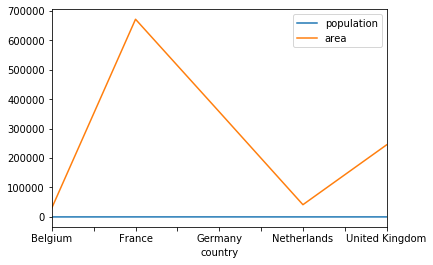

In [36]:
countries.plot()

However, for this dataset, it does not say that much:

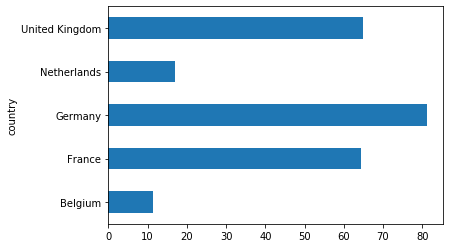

In [37]:
countries['population'].plot(kind='barh')

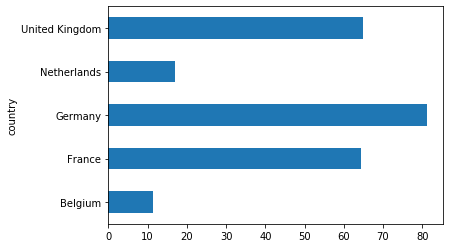

In [38]:
countries['population'].plot(kind='barh')

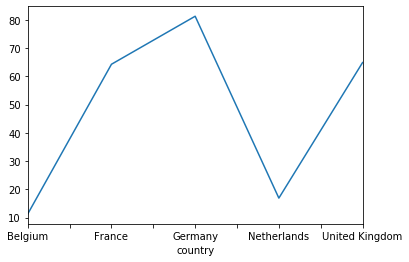

In [39]:
countries['population'].plot(kind='line')

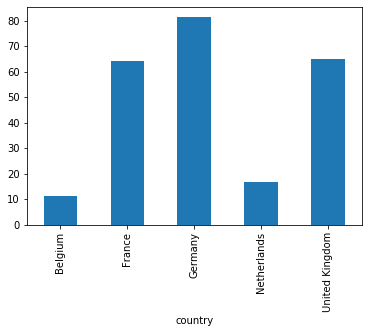

In [40]:
countries['population'].plot(kind='bar')

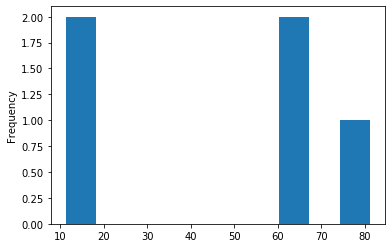

In [41]:
countries['population'].plot(kind='hist')

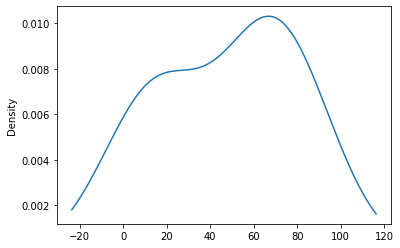

In [42]:
countries['population'].plot(kind='density')

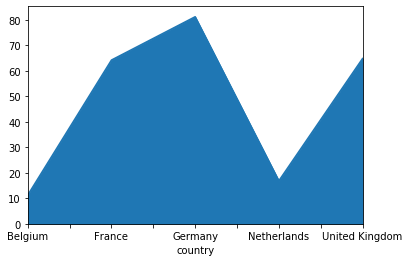

In [43]:
countries['population'].plot(kind='area')

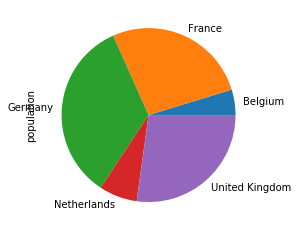

In [44]:
countries['population'].plot(kind='pie')

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>You can play with the `kind` keyword of the `plot` function in the figure above: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'</li>
    </ul>
</div>

# Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [45]:
# pd.read_

In [46]:
# states.to_